In [78]:
import pandas                           as pd
import matplotlib.pyplot                as plt
from sklearn.model_selection            import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree                       import DecisionTreeClassifier
from sklearn.metrics                    import roc_auc_score
from sklearn.svm                        import LinearSVC
from sklearn.compose                    import ColumnTransformer
from sklearn.pipeline                   import Pipeline

url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

# read the input data
raw_data=pd.read_csv(url)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


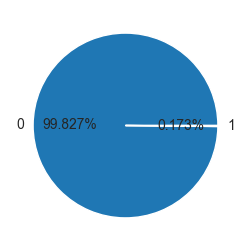

In [79]:
# Find the unique class labels.
labels = raw_data['Class'].unique()

# Count the amount of values that belong to each unique class.
sizes = raw_data['Class'].value_counts()

# Plot the target class distribution as a pie chart. We can see the target variable
# is very unbalanced, which we expect since most transactions are non-fraudulent.
fig, ax = plt.subplots(figsize=(3,3))
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
plt.show()

In [80]:
# Split data into input features and target
X = raw_data.drop(columns=["Class", "Time"])
y = raw_data['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This will FIRST standardise X_train THEN normalise it.
scaler = Pipeline([
    ("scaler", StandardScaler()),
    ("normalizer", Normalizer(norm="l1"))
])

# Apply the scaler to X_train
preprocessor = ColumnTransformer([
    ("num", scaler, X_train.columns)
])

# Build pipeline for decision tree
pipeline_dec_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=4,
                                          random_state=42, class_weight='balanced')),
])

# Build pipeline for support vector classification
pipeline_SVC = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LinearSVC(class_weight='balanced', random_state=42,
                             loss='hinge', fit_intercept=False)),
])

In [ ]:
# Process and train the decision tree model
pipeline_dec_tree.fit(X_train, y_train)

# Process and train the support vector classification model
pipeline_SVC.fit(X_train, y_train)

In [82]:
# AOC-AUC expects a 1d column of probabilities
y_pred_DT = pipeline_dec_tree.predict_proba(X_test)[:, 1]

ROC_AUC_DT = roc_auc_score(y_test, y_pred_DT)
print(f'Decision Tree ROC-AUC score : {ROC_AUC_DT:.3f}')

y_pred_SVR = pipeline_SVC.decision_function(X_test)

ROC_AUC_SVR = roc_auc_score(y_test, y_pred_SVR)
print(f"SVM ROC-AUC score: {ROC_AUC_SVR:.3f}")

Decision Tree ROC-AUC score : 0.929
SVM ROC-AUC score: 0.984
